
# Sold Prices in Tallkrogen

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from subprocess import check_output


### Call the Node Hemnet scraper which saves .json data file of sold properties in Tallkrogen

In [54]:
#check_output(['npm', 'run start'])

### Read in sold propertie json as dataframe

In [55]:
tallkrogen_sold_prices_df = pd.read_json("../data/salesData.json", dtype={
    'address': "string",
    'soldDate': "string",
    'livingArea': int,
    'extraArea': int,
    'land': int,
    'rooms': int,
    'houseType': "string",
    'assignment': "string",
    'askingPrice': int,
    'soldPrice': int
})


In [56]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000
1,Träningsvägen 23,2013-11-22,75,104,488,5,Villa,Äganderätt,4950000,5250000
2,Olympiavägen 67,2013-10-01,51,51,327,5,Villa,Äganderätt,3860000,3860000
3,Krokvägen 137,2013-11-28,54,54,514,3,Villa,Äganderätt,4290000,4850000
4,Hammerstavägen 114,2020-08-25,99,57,532,5,Villa,Tomträtt,6995000,8250000
5,Polovägen 13,2014-01-31,65,78,488,5,Villa,Äganderätt,4475000,4550000
6,Kulstötarvägen 57,2013-09-27,86,84,464,6,Villa,Äganderätt,4450000,4570000
7,Herrhagsvägen 88,2020-09-13,143,64,585,5,Villa,Äganderätt,7395000,8000000
8,Kulstötarvägen 49,2021-04-16,52,55,482,6,Villa,Äganderätt,5975000,7200000
9,Fasanvägen 2,2021-09-17,93,85,488,6,Villa,Äganderätt,,9000000


In [57]:
tallkrogen_sold_prices_df.shape

(221, 10)

In [58]:
tallkrogen_sold_prices_df.dtypes

address        object
soldDate       object
livingArea     object
extraArea      object
land           object
rooms           int64
houseType      object
assignment     object
askingPrice    object
soldPrice       int64
dtype: object

In [59]:
def checkAttribute(row): 
    try:
        str(row["address"])
    except:
        return False
    try:
        str(row["soldDate"])
    except:
        return False
    try:
        float(row["livingArea"])
    except:
        return False
    try:
        float(row["extraArea"])
    except:
        return False
    try:
        float(row["land"])
    except:
        return False
    try:
        float(row["rooms"])
    except:
        return False
    try:
        str(row["houseType"])
    except:
        return False
    try:
        str(row["assignment"])
    except:
        return False
    try:
        float(row["askingPrice"])
    except:
        return False
    try:
        float(row["soldPrice"])
    except:
        return False
    return True

In [60]:
for index, row in tallkrogen_sold_prices_df.iterrows():
    if checkAttribute(row) == False:
        tallkrogen_sold_prices_df.drop(index=index, inplace=True)

In [61]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000
1,Träningsvägen 23,2013-11-22,75,104,488,5,Villa,Äganderätt,4950000,5250000
2,Olympiavägen 67,2013-10-01,51,51,327,5,Villa,Äganderätt,3860000,3860000
3,Krokvägen 137,2013-11-28,54,54,514,3,Villa,Äganderätt,4290000,4850000
4,Hammerstavägen 114,2020-08-25,99,57,532,5,Villa,Tomträtt,6995000,8250000
5,Polovägen 13,2014-01-31,65,78,488,5,Villa,Äganderätt,4475000,4550000
6,Kulstötarvägen 57,2013-09-27,86,84,464,6,Villa,Äganderätt,4450000,4570000
7,Herrhagsvägen 88,2020-09-13,143,64,585,5,Villa,Äganderätt,7395000,8000000
8,Kulstötarvägen 49,2021-04-16,52,55,482,6,Villa,Äganderätt,5975000,7200000
10,Lingvägen 68,2013-04-09,69,69,520,5,Villa,Äganderätt,3400000,3400000


In [62]:
tallkrogen_sold_prices_df.shape

(211, 10)

In [63]:
tallkrogen_sold_prices_df["houseType"].unique()

array(['Villa'], dtype=object)

In [64]:
tallkrogen_sold_prices_df['soldDate'] = pd.to_datetime(tallkrogen_sold_prices_df['soldDate'])

In [65]:
tallkrogen_sold_prices_df.head(50)

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice
0,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000
1,Träningsvägen 23,2013-11-22,75,104,488,5,Villa,Äganderätt,4950000,5250000
2,Olympiavägen 67,2013-10-01,51,51,327,5,Villa,Äganderätt,3860000,3860000
3,Krokvägen 137,2013-11-28,54,54,514,3,Villa,Äganderätt,4290000,4850000
4,Hammerstavägen 114,2020-08-25,99,57,532,5,Villa,Tomträtt,6995000,8250000
5,Polovägen 13,2014-01-31,65,78,488,5,Villa,Äganderätt,4475000,4550000
6,Kulstötarvägen 57,2013-09-27,86,84,464,6,Villa,Äganderätt,4450000,4570000
7,Herrhagsvägen 88,2020-09-13,143,64,585,5,Villa,Äganderätt,7395000,8000000
8,Kulstötarvägen 49,2021-04-16,52,55,482,6,Villa,Äganderätt,5975000,7200000
10,Lingvägen 68,2013-04-09,69,69,520,5,Villa,Äganderätt,3400000,3400000


In [66]:
tallkrogen_sold_prices_df["soldDate"]

0     2013-10-03
1     2013-11-22
2     2013-10-01
3     2013-11-28
4     2020-08-25
         ...    
215   2014-10-17
216   2014-10-09
217   2014-02-05
218   2014-10-17
219   2014-05-14
Name: soldDate, Length: 211, dtype: datetime64[ns]

In [67]:
assignment_dict = {"Äganderätt": 1, "Tomträtt": 0}
tallkrogen_sold_prices_df['assignment_num'] = tallkrogen_sold_prices_df['assignment']
tallkrogen_sold_prices_df['assignment_num'].replace(assignment_dict, inplace=True)


tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice,assignment_num
0,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000,1
1,Träningsvägen 23,2013-11-22,75,104,488,5,Villa,Äganderätt,4950000,5250000,1
2,Olympiavägen 67,2013-10-01,51,51,327,5,Villa,Äganderätt,3860000,3860000,1
3,Krokvägen 137,2013-11-28,54,54,514,3,Villa,Äganderätt,4290000,4850000,1
4,Hammerstavägen 114,2020-08-25,99,57,532,5,Villa,Tomträtt,6995000,8250000,0


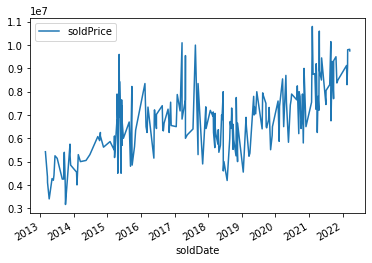

In [68]:
tallkrogen_sold_prices_df.plot(x='soldDate', y="soldPrice")

In [69]:
tallkrogen_sold_prices_df["price_per_sq_meter"] = tallkrogen_sold_prices_df["soldPrice"].astype(int) / (tallkrogen_sold_prices_df["livingArea"].astype(int) + (tallkrogen_sold_prices_df["extraArea"].astype(int)/ 2))






In [70]:
tallkrogen_sold_prices_df["soldPrice"].astype(int)

0      3160000
1      5250000
2      3860000
3      4850000
4      8250000
        ...   
215    6100000
216    5900000
217    4000000
218    6250000
219    5050000
Name: soldPrice, Length: 211, dtype: int64

In [71]:
tallkrogen_sold_prices_df.head()

,address,soldDate,livingArea,extraArea,land,rooms,houseType,assignment,askingPrice,soldPrice,assignment_num,price_per_sq_meter
0,Olympiavägen 82,2013-10-03,64,64,476,2,Villa,Äganderätt,3160000,3160000,1,32916.666667
1,Träningsvägen 23,2013-11-22,75,104,488,5,Villa,Äganderätt,4950000,5250000,1,41338.582677
2,Olympiavägen 67,2013-10-01,51,51,327,5,Villa,Äganderätt,3860000,3860000,1,50457.516340
3,Krokvägen 137,2013-11-28,54,54,514,3,Villa,Äganderätt,4290000,4850000,1,59876.543210
4,Hammerstavägen 114,2020-08-25,99,57,532,5,Villa,Tomträtt,6995000,8250000,0,64705.882353


In [72]:
tallkrogen_sold_prices_2021_df = tallkrogen_sold_prices_df[tallkrogen_sold_prices_df["soldDate"] >= "2021"]

In [73]:
tallkrogen_sold_prices_2021_df.shape

(33, 12)

Text(0, 0.5, 'price_per_sq_meter')

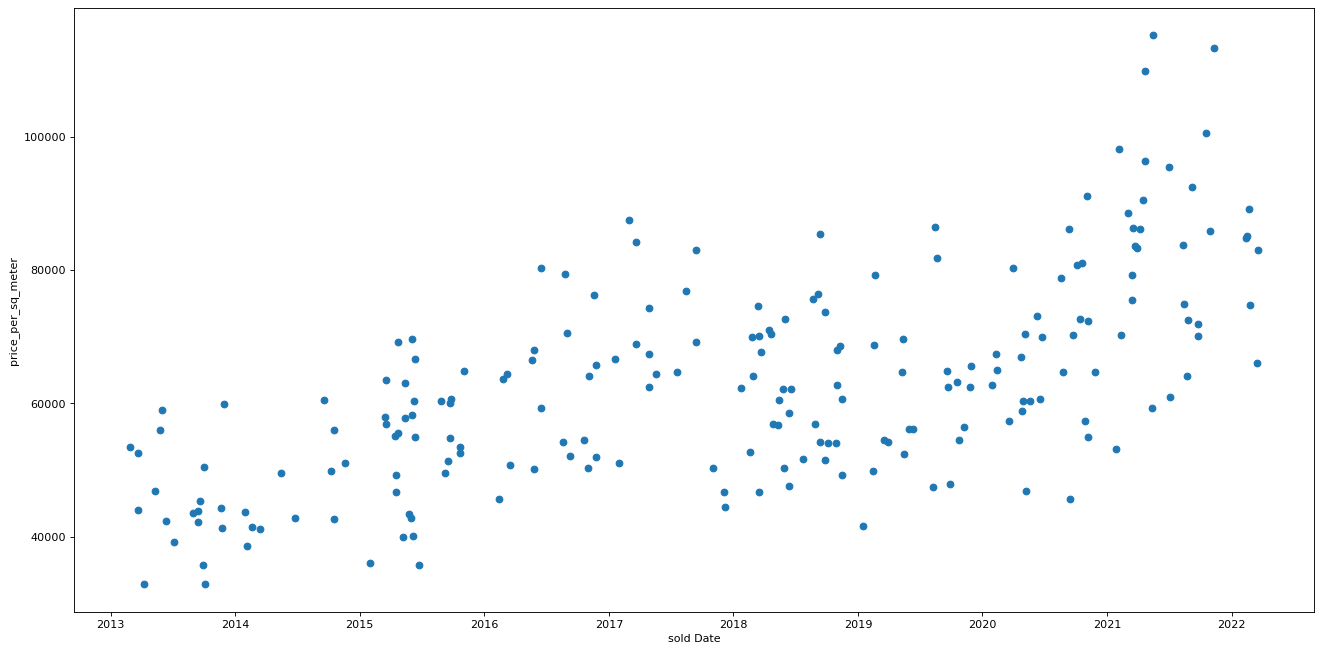

In [74]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("sold Date")
plt.ylabel("price_per_sq_meter")

Text(0, 0.5, 'price_per_sq_meter')

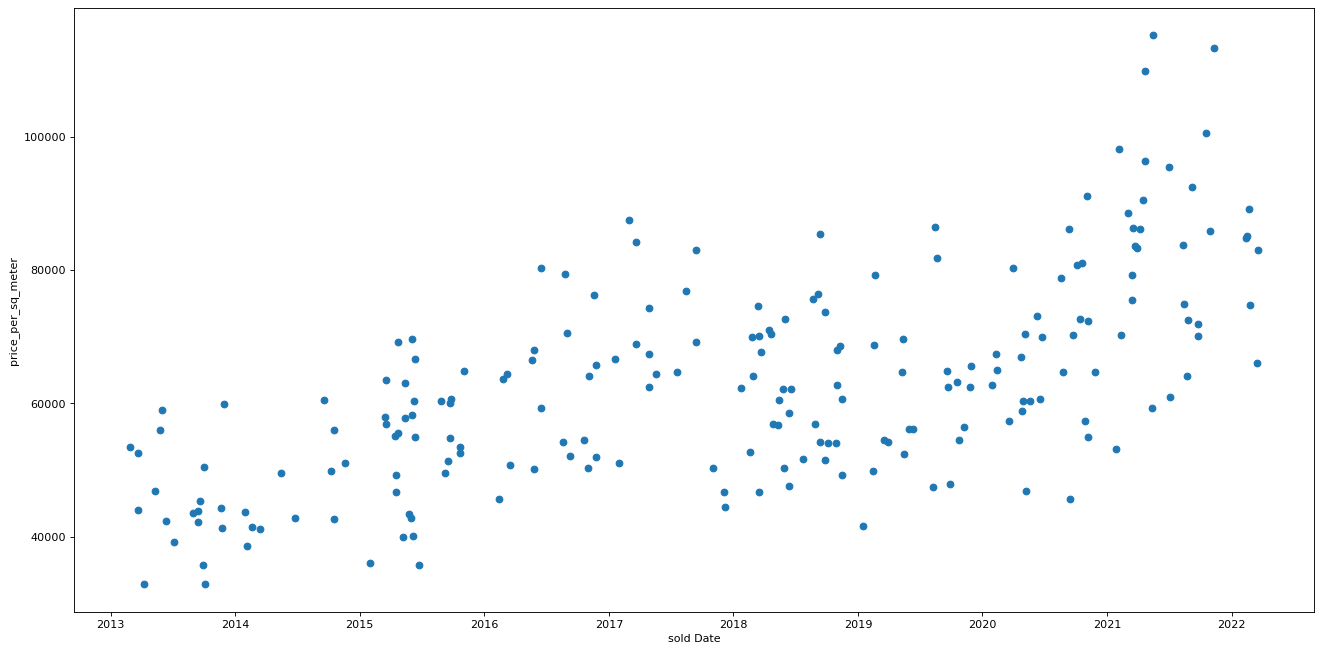

In [75]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldDate"], y=tallkrogen_sold_prices_df["price_per_sq_meter"])
plt.xlabel("sold Date")
plt.ylabel("price_per_sq_meter")

In [76]:
X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [77]:
reg.predict([[92, 51, 336, 5]])

array([7273324.74320949])

In [78]:
tallkrogen_sold_prices_df["soldDate"].dt.year

0      2013
1      2013
2      2013
3      2013
4      2020
       ... 
215    2014
216    2014
217    2014
218    2014
219    2014
Name: soldDate, Length: 211, dtype: int64

In [79]:
tallkrogen_sold_prices_df["soldYear"] = tallkrogen_sold_prices_df["soldDate"].dt.year

X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

reg.predict([[92, 51, 336, 5, 2022]])

array([8758703.92752361])

In [80]:

X = tallkrogen_sold_prices_df[["livingArea", "extraArea", "land", "rooms", "soldYear"]]
y = tallkrogen_sold_prices_df["soldPrice"]
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.predict([[92, 51, 336, 5, 2022]])

array([8667390.02086675])

In [85]:
X = tallkrogen_sold_prices_2021_df[["livingArea", "extraArea", "land", "rooms", "assignment_num"]]
y = tallkrogen_sold_prices_2021_df["soldPrice"]
reg = LinearRegression().fit(X, y)

In [87]:
reg.predict([[92, 51, 336, 5, 1]])

array([9029841.91306061])

Text(0, 0.5, 'Date')

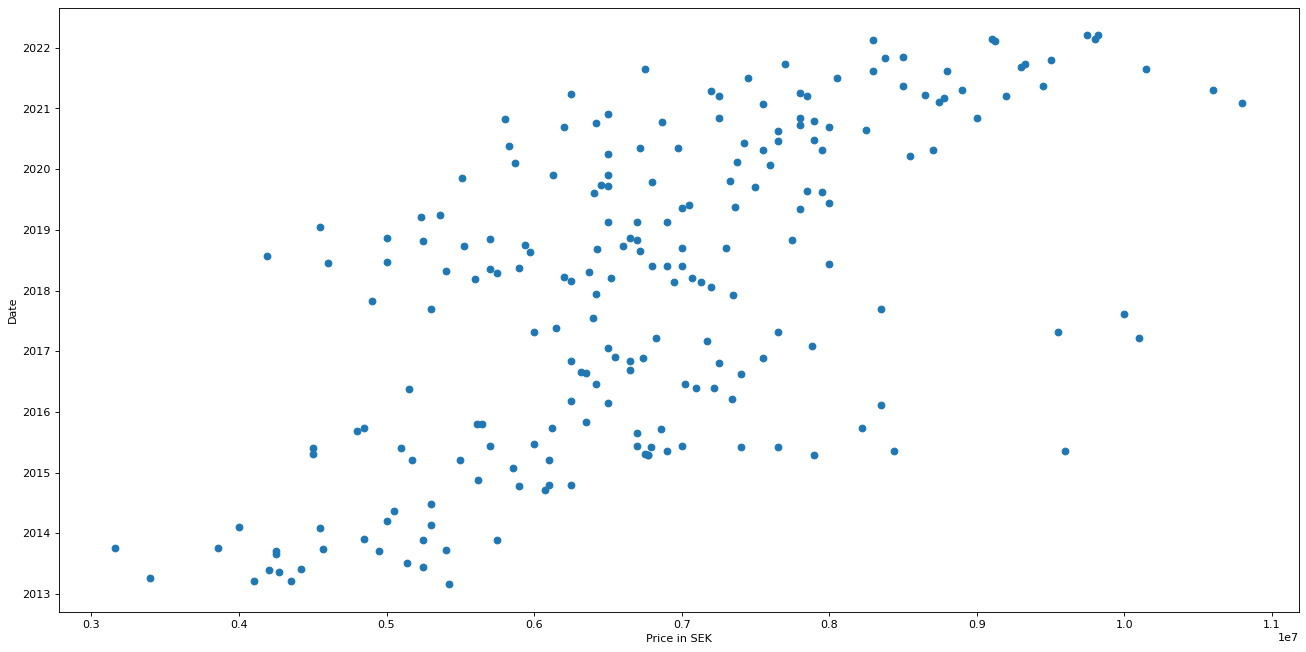

In [83]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")

In [84]:
X = tallkrogen_sold_prices_df[["houseArea"]]
y = tallkrogen_sold_prices_df["soldPrice"]
reg = LinearRegression().fit(X, y)

KeyError: "None of [Index(['houseArea'], dtype='object')] are in the [columns]"

In [ ]:
y_predict = reg.predict(X)


In [ ]:
reg.predict([[147]])

In [ ]:

plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["houseArea"])
plt.xlabel("Price in SEK")
plt.ylabel("Sq Foot Area")
plt.plot(X["houseArea"], y_predict, '-r', label='linear regression')


In [ ]:
X = tallkrogen_sold_prices_df[["soldPrice"]]
y = tallkrogen_sold_prices_df["soldDate"]
reg = LinearRegression().fit(X, y)

In [ ]:
y_predict = reg.predict(X)

In [ ]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=tallkrogen_sold_prices_df["soldPrice"], y=tallkrogen_sold_prices_df["soldDate"])
plt.xlabel("Price in SEK")
plt.ylabel("Date")
plt.plot(X["soldPrice"], y_predict, '-r', label='linear regression')

## 